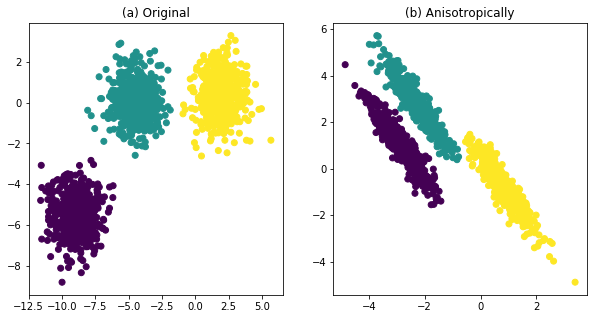

In [1]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# サンプルデータの準備
X, y = make_blobs(n_samples=1500, random_state=170)

# 変換行列の適用
transformation = [[0.5, -0.6], [-0.3, 0.8]]
X_aniso = np.dot(X, transformation)

# 変換結果の可視化
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("(a) Original")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.subplot(122)
plt.title("(b) Anisotropically")
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.show()

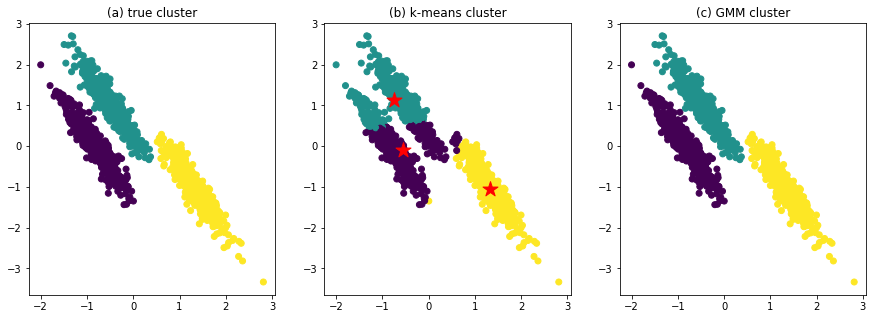

In [2]:
# 必要なライブラリのインポート
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# データの標準化
X_norm = StandardScaler().fit_transform(X_aniso)

# k-meansの適用（クラスタ数は3）
kmeans = KMeans(n_clusters=3, random_state=5)
kmeans.fit(X_norm)
kmeans_y_pred = kmeans.predict(X_norm)

# ガウス混合モデルの適用（混合要素数は3、共分散の形式はfull）
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=5)
gmm.fit(X_norm)
gmm_y_pred = gmm.predict(X_norm)

# クラスタリング結果の可視化
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("(a) true cluster")
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
plt.subplot(132)
plt.title("(b) k-means cluster")
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=kmeans_y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.subplot(133)
plt.title("(c) GMM cluster")
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=gmm_y_pred)
plt.show()

In [3]:
# 新しい入力データのクラスタ所属確率を計算
new_data = [[-0.5, 0.3]]
probs = gmm.predict_proba(new_data)[0]

# 結果の表示
for idx, prob in enumerate(probs):
  print(f'cluster{idx} probability:{prob:.3f}')

cluster0 probability:0.269
cluster1 probability:0.731
cluster2 probability:0.000
